In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from sklearn import svm

Dataset_MATLAB = scipy.io.loadmat('dataset.mat')
data_X = pd.DataFrame(Dataset_MATLAB['X'])
data_y = pd.DataFrame(Dataset_MATLAB['Y'])
X = data_X.iloc[:, [0,3]].values
y = data_y.iloc[:, 0].values

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

0.46 0.1 -10
0.46 0.1 -9
0.46 0.1 -8
0.46 0.1 -7
0.46 0.1 -6
0.46 0.1 -5
0.46 0.1 -4
0.46 0.1 -3
0.46 0.1 -2
0.46 0.1 -1
0.9 0.1 0
0.96 0.1 1
0.92 0.1 2
0.92 0.1 3
0.92 0.1 4
0.94 0.1 5
0.94 0.1 6
0.94 0.1 7
0.94 0.1 8
0.94 0.1 9
0.46 0.2 -10
0.46 0.2 -9
0.46 0.2 -8
0.46 0.2 -7
0.46 0.2 -6
0.46 0.2 -5
0.46 0.2 -4
0.46 0.2 -3
0.46 0.2 -2
0.52 0.2 -1
0.92 0.2 0
0.94 0.2 1
0.92 0.2 2
0.92 0.2 3
0.94 0.2 4
0.94 0.2 5
0.94 0.2 6
0.94 0.2 7
0.94 0.2 8
0.94 0.2 9
0.46 0.30000000000000004 -10
0.46 0.30000000000000004 -9
0.46 0.30000000000000004 -8
0.46 0.30000000000000004 -7
0.46 0.30000000000000004 -6
0.46 0.30000000000000004 -5
0.46 0.30000000000000004 -4
0.46 0.30000000000000004 -3
0.46 0.30000000000000004 -2
0.72 0.30000000000000004 -1
0.92 0.30000000000000004 0
0.94 0.30000000000000004 1
0.92 0.30000000000000004 2
0.92 0.30000000000000004 3
0.94 0.30000000000000004 4
0.94 0.30000000000000004 5
0.94 0.30000000000000004 6
0.94 0.30000000000000004 7
0.94 0.30000000000000004 8
0.94 0.30000000

1

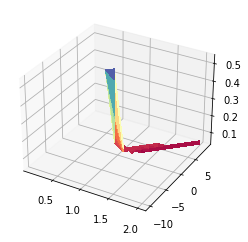

In [5]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
from sklearn.metrics import accuracy_score
import collections
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

loss_rbf = np.zeros((len(np.arange(0.1,2,0.1)),len(np.arange(-10,10))))
accuracy_rbf = np.zeros((len(np.arange(0.1,2,0.1)),len(np.arange(-10,10))))
count = 0
for g in np.arange(0.1,2,0.1):
    count1 = 0
    for C in range(-10,10):
        rbf_svc = svm.SVC(kernel='rbf', gamma=g, C=10**C)
        rbf_svc.fit(X_train, y_train)
        predicted_y = rbf_svc.predict(X_test)
        accuracy_rbf[count, count1] = accuracy_score(y_test, predicted_y)
        loss_rbf[count, count1] = 1 - accuracy_rbf[count, count1]
        print(accuracy_rbf[count, count1], g, C)
        count1 += 1
    count += 1

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(np.arange(0.1,2.1,0.1),np.arange(-10,10), loss_rbf, cmap=cm.Spectral,linewidth=0, antialiased=False)
np.argwhere(loss_rbf == np.min(loss_rbf))
np.arange(0.1,2,0.1)[0]
range(-10,10)[11]

[0.46] -10
[0.46] -9
[0.46] -8
[0.46] -7
[0.46] -6
[0.46] -5
[0.46] -4
[0.46] -3
[0.46] -2
[0.84] -1
[0.9] 0
[0.9] 1
[0.82] 2
[0.94] 3
[0.9] 4
[0.94] 5
[0.84] 6
[0.88] 7
[0.94] 8
[0.94] 9


/Users/nishitasinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nishitasinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nishitasinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nishitasinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nishitasinha/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nishitasinha/opt/anaconda3/lib/python3

3

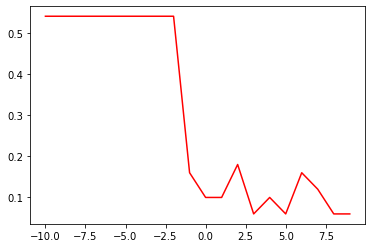

In [9]:
loss_lin = np.zeros((len(range(-10,10)),1))
acc_lin = np.zeros((len(range(-10,10)),1))

count = 0
for C in range(-10,10):
    lin_svc = svm.LinearSVC(C=10**C).fit(X_train, y_train)
    lin_svc.fit(X_train, y_train)
    predicted_y_lin = lin_svc.predict(X_test)
    acc_lin[count] = accuracy_score(y_test, predicted_y_lin) 
    loss_lin[count] = 1-acc_lin[count]
    print(acc_lin[count], C)
    count+=1
plt.plot(np.arange(-10,10), loss_lin, color='r')
range(-10,10)[np.argmin(loss_lin)]

0.46 0 -5
0.46 0 -4
0.46 0 -3
0.46 0 -2
0.46 0 -1
0.46 0 0
0.46 0 1
0.46 0 2
0.46 0 3
0.46 0 4
0.46 1 -5
0.46 1 -4
0.46 1 -3
0.46 1 -2
0.46 1 -1
0.86 1 0
0.94 1 1
0.94 1 2
0.94 1 3
0.94 1 4
0.46 2 -5
0.46 2 -4
0.46 2 -3
0.46 2 -2
0.82 2 -1
0.94 2 0
0.92 2 1
0.92 2 2
0.94 2 3
0.94 2 4
0.46 3 -5
0.46 3 -4
0.46 3 -3
0.78 3 -2
0.92 3 -1
0.92 3 0
0.92 3 1
0.92 3 2
0.94 3 3
0.94 3 4
0.46 4 -5
0.46 4 -4
0.78 4 -3
0.82 4 -2
0.92 4 -1
0.92 4 0
0.92 4 1
0.92 4 2
0.94 4 3
0.94 4 4
0.46 5 -5
0.78 5 -4
0.82 5 -3
0.92 5 -2
0.92 5 -1
0.92 5 0
0.92 5 1
0.92 5 2
0.92 5 3
0.92 5 4
0.46 6 -5
0.78 6 -4
0.92 6 -3
0.92 6 -2
0.92 6 -1
0.92 6 0
0.92 6 1
0.92 6 2
0.92 6 3
0.92 6 4
0.74 7 -5
0.82 7 -4
0.92 7 -3
0.92 7 -2
0.92 7 -1
0.92 7 0
0.92 7 1
0.92 7 2
0.94 7 3
0.88 7 4
0.78 8 -5
0.92 8 -4
0.92 8 -3
0.92 8 -2
0.92 8 -1
0.92 8 0
0.92 8 1
0.92 8 2
0.88 8 3
0.9 8 4
0.88 9 -5
0.92 9 -4
0.92 9 -3
0.92 9 -2
0.92 9 -1
0.92 9 0
0.92 9 1
0.94 9 2
0.88 9 3
0.88 9 4


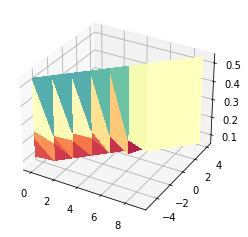

In [10]:
loss_poly = np.zeros((len(range(0,10)),len(range(-5,5))))
acc_poly = np.zeros((len(range(0,20)),len(range(-5,5))))
for d in range(0,10):
    count = 0
    for C in range(-5,5):
        poly_svc = svm.SVC(kernel='poly', degree=d, C=10**C).fit(X_train, y_train)
        poly_svc.fit(X_train, y_train)
        predicted_y_poly = poly_svc.predict(X_test)
        acc_poly[d, count] = accuracy_score(y_test, predicted_y_poly)
        loss_poly[d, count] = 1-acc_poly[d, count]
        print(acc_poly[d, count], d, C)
        count+=1
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(np.arange(0,10),np.arange(-5,5), loss_poly, cmap=cm.Spectral,linewidth=0, antialiased=False)

In [8]:
poly_svc = svm.SVC(kernel='poly', degree=2, C=10**1).fit(X_train, y_train)
poly_svc.fit(X_train, y_train)
predicted_y_poly = poly_svc.predict(X_test)
#predicted_y_poly
loss_poly = 1-accuracy_score(y_test, predicted_y_poly)
loss_poly

0.06000000000000005